In [22]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing.data import StandardScaler
from torch.autograd import Variable



device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [2]:
dataset_loc = 'datasets/covertype/covtype.data'

cols = ['Elevation', 'Aspect', 'Slope', 'Hor2Hydro', 'Ver2Hydro', 'Hor2Road', 'Hillshade_9am', 'Hillshade_Noon',
        'Hillshade_3pm', 'Hor2FirePt']

for f in range(0, 4):
    cols.append('Wilderness_Area_{}'.format(f))
    
for f in range(0, 40):
    cols.append('Soil_Type_%d'%f)

cols.append("Cover_Type")

df = pd.read_csv(dataset_loc, sep=',', names=cols)
df.head()

,Elevation,Aspect,Slope,Hor2Hydro,Ver2Hydro,Hor2Road,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Hor2FirePt,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [39]:
pd.set_option('display.max_columns', 55)

for f in range(0, 40):
    df['Soil_Type_%d'%f] = StandardScaler().fit_transform(df['Soil_Type_%d'%f].values.reshape(-1, 1))

df['Elevation'] = StandardScaler().fit_transform(df['Elevation'].values.reshape(-1, 1))
df['Aspect'] = StandardScaler().fit_transform(df['Aspect'].values.reshape(-1, 1))
df['Hor2Hydro'] = StandardScaler().fit_transform(df['Hor2Hydro'].values.reshape(-1, 1))
df['Ver2Hydro'] = StandardScaler().fit_transform(df['Ver2Hydro'].values.reshape(-1, 1))
df['Hor2Road'] = StandardScaler().fit_transform(df['Hor2Road'].values.reshape(-1, 1))
df['Hor2FirePt'] = StandardScaler().fit_transform(df['Hor2FirePt'].values.reshape(-1, 1))
df['Hillshade_9am'] = StandardScaler().fit_transform(df['Hillshade_9am'].values.reshape(-1, 1))
df['Hillshade_Noon'] = StandardScaler().fit_transform(df['Hillshade_Noon'].values.reshape(-1, 1))
df['Hillshade_3pm'] = StandardScaler().fit_transform(df['Hillshade_3pm'].values.reshape(-1, 1))

# df['Soil_Type_32'] = StandardScaler().fit_transform(df['Soil_Type_32'].values.reshape(-1, 1))
# df['Hor2FirePt'] = StandardScaler().fit_transform(df['Hor2FirePt'].values.reshape(-1, 1))
df.tail()

C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,Elevation,Aspect,Slope,Hor2Hydro,Ver2Hydro,Hor2Road,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Hor2FirePt,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Soil_Type_0,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
581007,-2.012130,-0.023740,20,-0.867697,-0.504653,-1.437962,1.040496,0.692069,-0.640851,-0.863386,0,0,1,0,-0.072416,8.729885,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,3
581008,-2.029988,-0.032675,19,-0.952383,-0.590424,-1.446299,1.040496,0.692069,-0.614724,-0.857345,0,0,1,0,-0.072416,8.729885,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,3
581009,-2.047847,0.029873,17,-0.985317,-0.676194,-1.449506,0.891075,0.894409,-0.327327,-0.850548,0,0,1,0,-0.072416,8.729885,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,3
581010,-2.054990,0.128163,15,-0.985317,-0.710502,-1.449506,0.666942,1.096749,0.012325,-0.842997,0,0,1,0,-0.072416,8.729885,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,3
581011,-2.058562,0.083486,13,-0.985317,-0.727656,-1.464256,0.704298,1.046164,-0.039929,-0.834690,0,0,1,0,-0.072416,8.729885,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,3


In [40]:
#10 non categorical and considered class 4 as anomaly and class 2 as normal.

#class 2 only has 2747 points while class 4 has 283301 points.

normal = df[df['Cover_Type'] == 2]
anomalies = df[df['Cover_Type'] == 4]


normal.loc[normal.Cover_Type == 2, 'Cover_Type'] = 0
anomalies.loc[anomalies.Cover_Type == 4, 'Cover_Type'] = 1

anomalies.shape, normal.shape

C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


((2747, 55), (283301, 55))

In [41]:

for f in range(0, 20):
    normal = normal.iloc[np.random.permutation(len(normal))]
    
data_set = normal[:10000]
# data_set = pd.concat([normal[:100000], anomalies])

x_train, x_test = train_test_split(data_set, test_size = 0.4, random_state = 42)

# x_train = x_train.sort_values(by=['Time'])
# x_test = x_test.sort_values(by=['Time'])

y_train = x_train["Cover_Type"]
y_test = x_test["Cover_Type"]

x_train = x_train.drop("Cover_Type", axis=1)
x_test = x_test.drop("Cover_Type", axis=1)

x_train.head(10)

,Elevation,Aspect,Slope,Hor2Hydro,Ver2Hydro,Hor2Road,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Hor2FirePt,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Soil_Type_0,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
571199,-1.554962,-0.676029,29,0.035624,1.279371,-1.006986,1.152563,-2.393620,-2.626508,-0.876980,0,0,1,0,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,4.099254,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,-0.214980,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
354597,0.577299,1.665063,5,0.379074,-0.195880,-0.826772,-0.117522,0.439143,0.482612,0.498952,0,0,1,0,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,4.651604,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
109072,-0.569193,1.423805,26,-0.364284,0.335896,0.714992,-2.545625,-0.673728,1.527694,-0.453326,1,0,0,0,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,2.010336,-0.234031,-0.214980,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
215966,-0.454901,-1.167479,19,0.172063,-0.041493,-0.493279,-0.192233,-1.381919,-0.614724,0.263337,0,0,1,0,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,-0.214980,-0.315238,3.444901,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
319370,-1.512103,1.450612,13,0.012100,-0.315958,-0.964017,-0.976697,0.236803,1.031280,-0.906432,0,0,0,1,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,9.347023,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,-0.214980,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
263088,0.048698,1.799095,14,0.623723,1.107830,-1.031998,-0.528432,-0.471388,0.299723,-0.171645,0,0,1,0,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,4.651604,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
301646,0.566584,0.163905,18,0.120310,0.009969,-1.343044,0.592231,1.147334,0.038452,-0.917759,0,0,1,0,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.3322

In [42]:
print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))


Shapes:
x_train:(6000, 54)
y_train:(6000,)

x_test:(4000, 54)
y_test:(4000,)



In [43]:
x_train = np.array(x_train).reshape(x_train.shape[0], 1, x_train.shape[1])
x_test = np.array(x_test).reshape(x_test.shape[0], 1,  x_test.shape[1])
# input_shape = (1, x_train.shape[1])

# y_train = keras.utils.to_categorical(y_train, 2)
# y_test = keras.utils.to_categorical(y_test, 2)


In [44]:
print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))
# print("input_shape:{}\n".format(input_shape))

Shapes:
x_train:(6000, 1, 54)
y_train:(6000,)

x_test:(4000, 1, 54)
y_test:(4000,)



In [45]:
original_dim  = x_train.shape[2]

print(original_dim)

input_shape = (original_dim, 1)
intermediate_dim = 25
# batch_size = original_dim
batch_size = 20
latent_dim = 2
num_epochs = 400
learning_rate = 0.002

reconstruction_function = nn.MSELoss(size_average=False)

54


C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\torch\nn\functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [46]:
class VAE_TCN(nn.Module):
    def __init__(self):
        super(VAE_TCN, self).__init__()
        
        
#         self.dense_0 = nn.Linear(original_dim, original_dim)
        self.conv_1 = nn.Conv1d(1, 28, kernel_size=2, dilation=1, padding=((2-1) * 1))
        self.conv_2 = nn.Conv1d(28, 128, kernel_size=2, dilation=1, padding=((2-1) * 1))
        self.dense_1 = nn.Linear(original_dim*128  , 28)
        self.dense_2 = nn.Linear(28, intermediate_dim)
        self.z_mean = nn.Linear(intermediate_dim, latent_dim)
        self.z_log_var = nn.Linear(intermediate_dim, latent_dim)

#         self.z = self.sampling(z_mean, z_log_var)

#         self.dense_3 = nn.Linear(2, 28)
        self.conv_3 = nn.Conv1d(1, 128, kernel_size=2, dilation=1, padding=((2-1) * 1))
        self.conv_4 = nn.Conv1d(128, 28, kernel_size=2, dilation=1, padding=((2-1) * 1))

        self.dense_4 = nn.Linear(latent_dim*28, original_dim)


#         x = Dense(intermediate_dim, activation='relu')(latent_inputs)
#         outputs = Dense(original_dim, activation='sigmoid')(x)
#         outputs = Reshape((original_dim, 1))(outputs)

        

    def sampling(self, z_mean, z_log_var ):
        """Reparameterization trick by sampling from an isotropic unit Gaussian.
        # Arguments
            args (tensor): mean and log of variance of Q(z|X)
        # Returns
            z (tensor): sampled latent vector
        """
#         z_mean, z_log_var = torch.Tensor(z_mean).float(), torch.Tensor(z_log_var).float()
        batch = list(z_mean.shape)[0]
        dim =list(z_mean.shape)[1]
        # by default, random_normal has mean = 0 and std = 1.0
        epsilon = torch.Tensor(np.random.normal(size=(batch, dim))).cuda().float()
        return z_mean + torch.exp(0.5 * z_log_var) * epsilon

    def encode(self, x):
#         x = self.dense_0(x)
        x = self.conv_1(x)
        x = x[:, :, :-self.conv_1.padding[0]]
        x = F.relu(x)
        x = F.dropout(x, 0.05)
        x = self.conv_2(x)
        x = x[:, :, :-self.conv_2.padding[0]]
        x = F.relu(x)
        x = F.dropout(x, 0.05)
        
        
        x = x.view(-1, original_dim*128)
        x = F.relu(self.dense_1(x))
        x = self.dense_2(x)
        x = F.relu(x)
        
        z_mean = self.z_mean(x)
        z_log_var = self.z_log_var(x)
        
        
        z = self.sampling(z_mean, z_log_var)
        return z_mean, z_log_var#, F.log_softmax(x, dim=1)

    
    def decode(self, z):

        z = z.unsqueeze(-2)
    
        z = self.conv_3(z)
        z = z[:, :, :-self.conv_3.padding[0]]
        z = F.relu(z)
        
        z = self.conv_4(z)
        z = z[:, :, :-self.conv_4.padding[0]]
        z = F.relu(z)
        
        z = F.dropout(z, 0.05)
        z = z.view(-1, latent_dim*28)
        z = self.dense_4(z)
#         z = z.unsqueeze(-2)
        print(z.shape)
        return F.sigmoid(z)
        
    def forward(self, x):
        z_mean, z_log_var = self.encode(x)
        z = self.sampling(z_mean, z_log_var)
        decoder_output = self.decode(z)
        return decoder_output, z_mean, z_log_var

In [47]:
def vae_loss(pred_x, x, z_mean, z_log_var):
#     reconstruction_loss = reconstruction_function(pred_x, x)
    reconstruction_loss = torch.mean(torch.pow(pred_x - x, 2))
#     print(reconstruction_loss)
    
    reconstruction_loss *= original_dim
    kl_loss = 1 + z_log_var - torch.pow(z_mean, 2) - torch.exp(z_log_var)
    kl_loss = torch.sum(kl_loss, dim=-1)
    kl_loss *= -0.5
    vae_loss = torch.mean(reconstruction_loss + kl_loss)
#     vae.add_loss(vae_loss)
    return vae_loss
    
    
# def vae_loss_2(recon_x, x, mu, logvar):
#     BCE = reconstruction_function(recon_x, x)  # mse loss
#     # loss = 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
#     KLD_element = mu.pow(2).add_(logvar.exp()).mul_(-1).add_(1).add_(logvar)
#     KLD = torch.sum(KLD_element).mul_(-0.5)
#     # KL divergence
#     return BCE + KLD

In [48]:
def train(model, device, x_train, optimizer, epoch, save_dir='VAE_TCN_PyTorch.ckpt'):
    total_step = len(x_train)
    
    x_train = torch.Tensor(x_train).cuda().float()
#     y_train = torch.Tensor(y_train).cuda().long()

    x_train.to(device)
#     y_train.to(device)

    # Forward pass
    output, z_mean, z_log_var = model(x_train)
#     loss = criterion(output, y_train.squeeze(1))
    loss = vae_loss(output, x_train.squeeze(1), z_mean, z_log_var)
    

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print('Epoch {}/{}, Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

    torch.save(model.state_dict(), save_dir)

In [49]:
from sklearn.metrics import roc_auc_score

def test(model, device, x_test, y_test):
    
    model.eval()
    with torch.no_grad():
        x_test = torch.Tensor(x_test).cuda().float()
        
        y_test = np.array(y_test)
        y_test = torch.Tensor(y_test).cuda().float()
        
        x_test = x_test.to(device)
#         y_test= x_test
        y_test = y_test.to(device)
#         y_test = y_test.squeeze(1)

        preds, z_mean, z_log_Var = model(x_test)
        
#         preds = np.array(preds)
        preds = preds.detach().cpu().numpy()
        print(preds.shape, x_test.shape)
#         y_test = y_test.detach().cpu().numpy()
        x_test= x_test.detach().cpu().numpy().reshape(x_test.shape[0], x_test.shape[-1])
    
        pred_mse = np.mean(np.power(preds - x_test, 2), axis=1, keepdims=False)
        pred_error_df = pd.DataFrame({'reconstruction_error': pred_mse,
                        'true_class': y_test})

        print(pred_error_df.quantile(0.75), pred_error_df.quantile(0.25))
        threshold = 15.5 * (pred_error_df.quantile(0.75) - pred_error_df.quantile(0.25))
        groups = pred_error_df.groupby('true_class')
        fig, ax = plt.subplots()

        for name, group in groups:
            ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
                    label= "Fraud" if name == 1 else "Normal")
        ax.hlines(threshold.reconstruction_error, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
        ax.legend()
        plt.title("Reconstruction error for different classes")
        plt.ylabel("Reconstruction error")
        plt.xlabel("Data point index")
        plt.show();
        
        import seaborn as sns
        from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                                     roc_curve, recall_score, classification_report, f1_score,
                                     precision_recall_fscore_support)

        LABELS = ["Normal", "Fraud"]

        y_pred = [1 if e > threshold.reconstruction_error else 0 for e in pred_error_df.reconstruction_error.values]
        conf_matrix = confusion_matrix(pred_error_df.true_class, y_pred)

        plt.figure(figsize=(12, 12))
        sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
        plt.title("Confusion matrix")
        plt.ylabel('True class')
        plt.xlabel('Predicted class')
        plt.show()
        
        counter = []

        for f in range(0, len(pred_error_df)):
            if pred_error_df.reconstruction_error.values[f] > threshold.reconstruction_error:
                counter.append(1)
            else:
                counter.append(0)
                
        auc = roc_auc_score( counter, y_test)
        print("AUC: {:.2%}".format (auc))
        


In [50]:
model = VAE_TCN().to(device)
# criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

print(model)

VAE_TCN(
  (conv_1): Conv1d(1, 28, kernel_size=(2,), stride=(1,), padding=(1,))
  (conv_2): Conv1d(28, 128, kernel_size=(2,), stride=(1,), padding=(1,))
  (dense_1): Linear(in_features=6912, out_features=28, bias=True)
  (dense_2): Linear(in_features=28, out_features=25, bias=True)
  (z_mean): Linear(in_features=25, out_features=2, bias=True)
  (z_log_var): Linear(in_features=25, out_features=2, bias=True)
  (conv_3): Conv1d(1, 128, kernel_size=(2,), stride=(1,), padding=(1,))
  (conv_4): Conv1d(128, 28, kernel_size=(2,), stride=(1,), padding=(1,))
  (dense_4): Linear(in_features=56, out_features=54, bias=True)
)


In [51]:


## Training phase

for epoch in range(0, num_epochs):
    train(model, device, x_train, optimizer, epoch)


torch.Size([6000, 54])
Epoch 1/400, Loss: 275.1202
torch.Size([6000, 54])


C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 2/400, Loss: 274.0999
torch.Size([6000, 54])
Epoch 3/400, Loss: 272.9755
torch.Size([6000, 54])
Epoch 4/400, Loss: 271.7298
torch.Size([6000, 54])
Epoch 5/400, Loss: 270.4224
torch.Size([6000, 54])
Epoch 6/400, Loss: 268.7474
torch.Size([6000, 54])
Epoch 7/400, Loss: 266.8555
torch.Size([6000, 54])
Epoch 8/400, Loss: 265.1026
torch.Size([6000, 54])
Epoch 9/400, Loss: 263.3603
torch.Size([6000, 54])
Epoch 10/400, Loss: 261.5446
torch.Size([6000, 54])
Epoch 11/400, Loss: 260.0367
torch.Size([6000, 54])
Epoch 12/400, Loss: 258.4465
torch.Size([6000, 54])
Epoch 13/400, Loss: 256.9152
torch.Size([6000, 54])
Epoch 14/400, Loss: 255.6777
torch.Size([6000, 54])
Epoch 15/400, Loss: 254.5838
torch.Size([6000, 54])
Epoch 16/400, Loss: 253.6683
torch.Size([6000, 54])
Epoch 17/400, Loss: 252.7966
torch.Size([6000, 54])
Epoch 18/400, Loss: 252.1432
torch.Size([6000, 54])
Epoch 19/400, Loss: 251.5785
torch.Size([6000, 54])
Epoch 20/400, Loss: 251.0999
torch.Size([6000, 54])
Epoch 21/400, Loss: 

Epoch 160/400, Loss: 248.8139
torch.Size([6000, 54])
Epoch 161/400, Loss: 248.8220
torch.Size([6000, 54])
Epoch 162/400, Loss: 248.8172
torch.Size([6000, 54])
Epoch 163/400, Loss: 248.8275
torch.Size([6000, 54])
Epoch 164/400, Loss: 248.8133
torch.Size([6000, 54])
Epoch 165/400, Loss: 248.8119
torch.Size([6000, 54])
Epoch 166/400, Loss: 248.8120
torch.Size([6000, 54])
Epoch 167/400, Loss: 248.8036
torch.Size([6000, 54])
Epoch 168/400, Loss: 248.8105
torch.Size([6000, 54])
Epoch 169/400, Loss: 248.8096
torch.Size([6000, 54])
Epoch 170/400, Loss: 248.8082
torch.Size([6000, 54])
Epoch 171/400, Loss: 248.8052
torch.Size([6000, 54])
Epoch 172/400, Loss: 248.7816
torch.Size([6000, 54])
Epoch 173/400, Loss: 248.7876
torch.Size([6000, 54])
Epoch 174/400, Loss: 248.7773
torch.Size([6000, 54])
Epoch 175/400, Loss: 248.7841
torch.Size([6000, 54])
Epoch 176/400, Loss: 248.7764
torch.Size([6000, 54])
Epoch 177/400, Loss: 248.7676
torch.Size([6000, 54])
Epoch 178/400, Loss: 248.7525
torch.Size([6000

Epoch 316/400, Loss: 246.9057
torch.Size([6000, 54])
Epoch 317/400, Loss: 246.8864
torch.Size([6000, 54])
Epoch 318/400, Loss: 246.8569
torch.Size([6000, 54])
Epoch 319/400, Loss: 246.8132
torch.Size([6000, 54])
Epoch 320/400, Loss: 246.8363
torch.Size([6000, 54])
Epoch 321/400, Loss: 246.8207
torch.Size([6000, 54])
Epoch 322/400, Loss: 246.8207
torch.Size([6000, 54])
Epoch 323/400, Loss: 246.8067
torch.Size([6000, 54])
Epoch 324/400, Loss: 246.7682
torch.Size([6000, 54])
Epoch 325/400, Loss: 246.7823
torch.Size([6000, 54])
Epoch 326/400, Loss: 246.7311
torch.Size([6000, 54])
Epoch 327/400, Loss: 246.7183
torch.Size([6000, 54])
Epoch 328/400, Loss: 246.7036
torch.Size([6000, 54])
Epoch 329/400, Loss: 246.6914
torch.Size([6000, 54])
Epoch 330/400, Loss: 246.6737
torch.Size([6000, 54])
Epoch 331/400, Loss: 246.6487
torch.Size([6000, 54])
Epoch 332/400, Loss: 246.6400
torch.Size([6000, 54])
Epoch 333/400, Loss: 246.6653
torch.Size([6000, 54])
Epoch 334/400, Loss: 246.6401
torch.Size([6000

torch.Size([4000, 54])
(4000, 54) torch.Size([4000, 1, 54])
reconstruction_error    5.893671
true_class              0.000000
Name: 0.75, dtype: float64 reconstruction_error    1.433899
true_class              0.000000
Name: 0.25, dtype: float64


C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


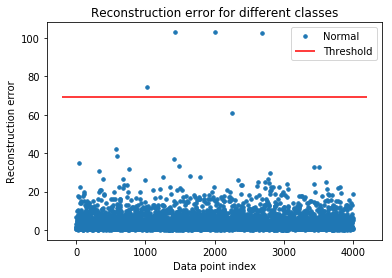

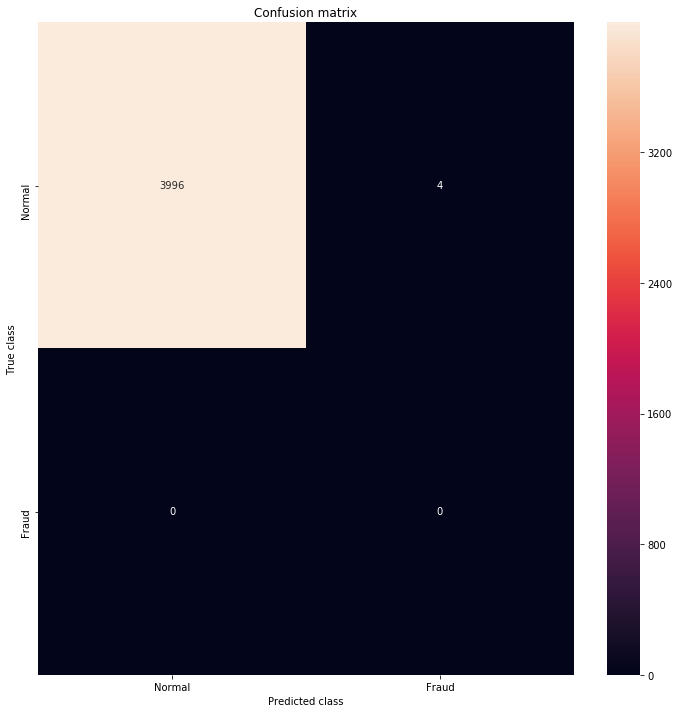

AUC: 50.00%


In [52]:
## Testing phase

test(model, device, x_test, y_test)

torch.Size([2747, 54])
(2747, 54) torch.Size([2747, 1, 54])
reconstruction_error    16.004348
true_class               1.000000
Name: 0.75, dtype: float64 reconstruction_error    4.68671
true_class              1.00000
Name: 0.25, dtype: float64


C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


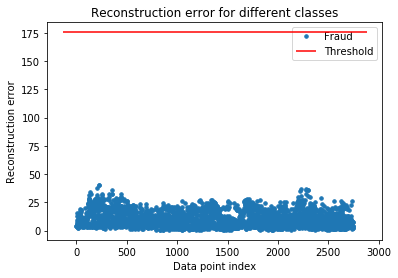

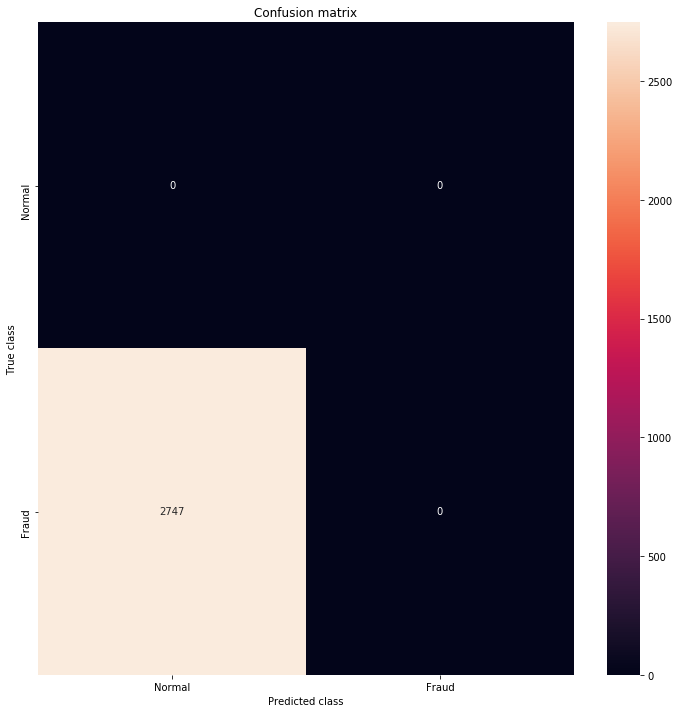

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [53]:
## Anomalies

## Testing phase

points = np.array(anomalies.drop('Cover_Type', axis=1))[:100000]
truths = anomalies['Cover_Type'][:100000]

points = points.reshape(points.shape[0], 1, points.shape[1])


test(model, device, points, truths)


In [37]:
## Testing phase

points = np.array(df.drop('Cover_Type', axis=1))[:100000]
truths = df['Cover_Type'][:100000]

points = points.reshape(points.shape[0], 1, points.shape[1])


test(model, device, points, truths)

KeyError: "['Class'] not found in axis"

In [206]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score( counter, truths)
print("AUC: {:.2%}".format (auc))

NameError: name 'counter' is not defined

In [46]:
torch.cuda.empty_cache

<function torch.cuda.empty_cache()>